In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import nnfs
import math
import random

from nnfs.datasets import spiral_data, vertical_data, sine_data

from mnist import download_data, create_mnist_dataset
from model import Model
from layers import Dense, Dropout
from activations import ReLU, SoftMax, Sigmoid, Linear
from losses import CategoricalCrossEntropy, Softmax_CategoricalCrossentropy, BinaryCrossentropy, MeanAbsoluteError, MeanSquaredError
from optimizers import SGD, AdaGrad, RMSProp, Adam
from metrics import Accuracy_Regression, Accuracy_Categorical

In [3]:
nnfs.init()

## CH 19: Real Dataset

In [5]:
labels = os.listdir("fashion_mnist_images/train")
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [8]:
files = os.listdir("fashion_mnist_images/train/0")
print(files[:10])
print(len(files))

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000


In [21]:
image_data = cv2.imread("fashion_mnist_images/train/7/0002.png", cv2.IMREAD_UNCHANGED)
image_data.shape

(28, 28)

In [22]:
np.set_printoptions(linewidth=200)
print(image_data[:,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49 135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 255 220 21

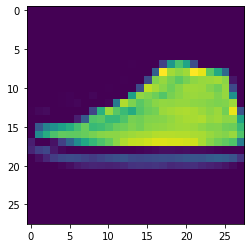

In [23]:
plt.imshow(image_data)
plt.show()

In [46]:
X, y, X_test, y_test = create_mnist_dataset('fashion_mnist_images')
print(X.shape)
print(y.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [47]:
# To float
X = X.astype(np.float32) 

# Normalize (-1,1)
X -= 127.5
X /= 127.5

X_test = (X_test.astype(np.float32) - 127.5) / 127.5

In [49]:
print(X.min(), X.max())

-1.0 1.0


In [50]:
# Reshape to flattened vectors
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [51]:
# Shuffle
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)

X = X[keys]
y = y[keys]

In [52]:
y[:10]

array([0, 3, 9, 1, 6, 5, 3, 9, 0, 4], dtype=uint8)

In [4]:
X, y = spiral_data(samples=1000, classes=3)
X_test, y_test = spiral_data(samples=100, classes=3)

# y = y.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

In [12]:
model = Model()
model.add(Dense(2, 512, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(ReLU())
model.add(Dropout(0.1))
model.add(Dense(512, 3))
model.add(SoftMax())

In [13]:
model.set(loss=CategoricalCrossEntropy(), optimizer=Adam(learning_rate=0.05, decay=5e-5), accuracy=Accuracy_Categorical())

In [14]:
model.finalize()

In [ ]:
model.train(X, y, validation_data=(X_test, y_test), epochs=10000, print_every=100)

epoch: 100, acc: 0.719, loss: 0.7331, data_loss: 0.6762, reg_loss: 0.0570, lr: 0.04975371909050202
epoch: 200, acc: 0.773, loss: 0.6229, data_loss: 0.5488, reg_loss: 0.0741, lr: 0.049507401356502806
epoch: 300, acc: 0.794, loss: 0.5953, data_loss: 0.5194, reg_loss: 0.0759, lr: 0.0492635105177595
epoch: 400, acc: 0.819, loss: 0.5489, data_loss: 0.4717, reg_loss: 0.0772, lr: 0.04902201088288642
epoch: 500, acc: 0.832, loss: 0.5305, data_loss: 0.4534, reg_loss: 0.0771, lr: 0.048782867456949125
epoch: 600, acc: 0.820, loss: 0.5378, data_loss: 0.4627, reg_loss: 0.0750, lr: 0.04854604592455945
epoch: 700, acc: 0.846, loss: 0.5088, data_loss: 0.4368, reg_loss: 0.0720, lr: 0.048311512633460556
epoch: 800, acc: 0.839, loss: 0.4925, data_loss: 0.4199, reg_loss: 0.0726, lr: 0.04807923457858551
epoch: 900, acc: 0.843, loss: 0.4843, data_loss: 0.4140, reg_loss: 0.0703, lr: 0.04784917938657352
epoch: 1000, acc: 0.844, loss: 0.4886, data_loss: 0.4194, reg_loss: 0.0693, lr: 0.04762131530072861
epoch: 